In [14]:
import requests
import re
from bs4 import BeautifulSoup
import collections

In [15]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.84 Safari/537.36'
}

def fetch(url):
    response = requests.get(url,headers = headers)
    content = BeautifulSoup(response.content,'html.parser')
    return content

In [16]:
# !pip install bs4

In [17]:
content = fetch('https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485')

In [18]:
content

<!DOCTYPE html>

<!--STATUS OK-->
<html>
<head>
<meta charset="utf-8"/>
<meta content="IE=Edge" http-equiv="X-UA-Compatible">
<meta content="always" name="referrer"/>
<meta content="北京地铁（Beijing Subway）是服务于中国北京市的城市轨道交通系统，也是国际地铁联盟（CoMET）的14个成员之一，其第一条线路于1971年1月15日正式开通运营，使北京成为中国第一个开通地铁的城市。2017年，北京地铁年乘客量达到45.3亿人次，日均客流为1241.1万人次，单日客运量最高达1327.46万人次。截至2018年12月，北京地铁运营线路共有22条地铁线路，均采用地铁系统，覆盖北京市11个市辖区，运营里程637千米，共设车站391座，开通里程居中国第二位。在建线路15条，共320.8千米。2018年12月30日，北京地铁8号线三期、8号线四期、6号线西延等线路开通试运营。至此，北京地铁新增里程28.6公里，运营总里程达636.8公里。到2020年，北京地铁将形成线网由30条运营，总长1177公里的的轨道交通网络。 北京轨道交通1月20日起试行推出电子定期票，为乘客地..." name="description"/>
<title>北京地铁（北京市城市轨道交通系统）_百度百科</title>
<link href="/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="//www.baidu.com/img/baidu.svg" mask="" rel="icon" sizes="any"/>
<meta content="北京地铁 北京地铁概况 Beijing Subway 北京轨道交通 北京地铁发展历程 北京地铁运营情况 北京地铁设备设施 北京地铁乘坐导引 北京地铁文化特色 北京地铁建设规划 北京地铁价值意义" name="keywords"/>
<meta content="https://bkssl.bdimg.com/cms/static/baike.png" name="image"/>
<sc

In [19]:
# lines = content.find_all('table')[4].find_all('a')[:-1]

In [20]:
lines = content.find_all('table')[4].find_all('a')[:-1]

In [21]:
lines

[<a href="/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%811%E5%8F%B7%E7%BA%BF" target="_blank">北京地铁1号线</a>,
 <a href="/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%812%E5%8F%B7%E7%BA%BF" target="_blank">北京地铁2号线</a>,
 <a href="/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%814%E5%8F%B7%E7%BA%BF" target="_blank">北京地铁4号线</a>,
 <a href="/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%815%E5%8F%B7%E7%BA%BF" target="_blank">北京地铁5号线</a>,
 <a href="/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%816%E5%8F%B7%E7%BA%BF" target="_blank">北京地铁6号线</a>,
 <a href="/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%817%E5%8F%B7%E7%BA%BF" target="_blank">北京地铁7号线</a>,
 <a href="/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%818%E5%8F%B7%E7%BA%BF" target="_blank">北京地铁8号线</a>,
 <a href="/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%819%E5%8F%B7%E7%BA%BF" target="_blank">北京地铁9号线</a>,
 <a href="/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8110%E5%8F%B7%E7%BA%BF" target="_blank">北京地铁10号线</a>,
 <a href="/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8113%E5%8F%B7%E7%BA%BF" target

In [22]:
stations_connection = collections.defaultdict(list)
station_in_line = collections.defaultdict(set)
dist = collections.defaultdict(int)

In [23]:
!pip install re

  Could not find a version that satisfies the requirement re (from versions: )
No matching distribution found for re


In [44]:
match = re.compile('([\d|\w]+)相邻站间距信息统计表')
for line in lines[:-3]:
    link = 'https://baike.baidu.com' + line.get('href')
    content = fetch(link)
    for caption in content.find_all('caption'):
        line_name = re.findall(match, caption.get_text())
        if line_name:
            print('******************\n地铁{}号线的信息:'.format(line_name[0]))
            table = caption.find_parent('table')
            for neigbor in table.find_all('tr')[1:]:
                start,end = re.findall(re.compile('([\w|\d]+)——([\w|\d]+)'),neigbor.th.text)[0]
#                 start,end = re.findall(re.compile('([\w|\d]+)--([\w|\d]+)'),neigbor.th.text)[0]
                distance = re.findall(re.compile('([\d]+)米*'), neigbor.td.text)[0]
                
                stations_connection[start].append(end)
                stations_connection[end].append(start)
                
                dist[(start,end)] = dist[(end,start)] = int(distance)
                
                station_in_line[start].add(line_name[0])
                station_in_line[end].add(line_name[0])
                
                
                print('{}----{}:{}m'.format(start,end,distance))
                
            break
            

******************
地铁1号线号线的信息:
苹果园----古城:2606m
古城----八角游乐园:1921m
八角游乐园----八宝山:1953m
八宝山----玉泉路:1479m
玉泉路----五棵松:1810m
五棵松----万寿路:1778m
万寿路----公主坟:1313m
公主坟----军事博物馆:1172m
军事博物馆----木樨地:1166m
木樨地----南礼士路:1291m
南礼士路----复兴门:424m
复兴门----西单:1590m
西单----天安门西:1217m
天安门西----天安门东:925m
天安门东----王府井:852m
王府井----东单:774m
东单----建国门:1230m
建国门----永安里:1377m
永安里----国贸:790m
国贸----大望路:1385m
大望路----四惠:1673m
四惠----四惠东:1714m
******************
地铁2号线号线的信息:
西直门----车公庄:909m
车公庄----阜成门:960m
阜成门----复兴门:1832m
复兴门----长椿街:1234m
长椿街----宣武门:929m
宣武门----和平门:851m
和平门----前门:1171m
前门----崇文门:1634m
崇文门----北京站:1023m
北京站----建国门:945m
建国门----朝阳门:1763m
朝阳门----东四十条:1027m
东四十条----东直门:824m
东直门----雍和宫:2228m
雍和宫----安定门:794m
安定门----鼓楼大街:1237m
鼓楼大街----积水潭:1766m
积水潭----西直门:1899m
******************
地铁4号线号线的信息:
安河桥北----北宫门:1363m
北宫门----西苑:1251m
西苑----圆明园:1672m
圆明园----北京大学东门:1295m
北京大学东门----中关村:887m
中关村----海淀黄庄:900m
海淀黄庄----人民大学:1063m
人民大学----魏公村:1051m
魏公村----国家图书馆:1658m
国家图书馆----动物园:1517m
动物园----西直门:1441m
西直门----新街口:1025m
新街口----平安里:1100m
平

In [49]:
!pip install networkx

In [50]:
import matplotlib.pyplot as plt
import networkx as nx

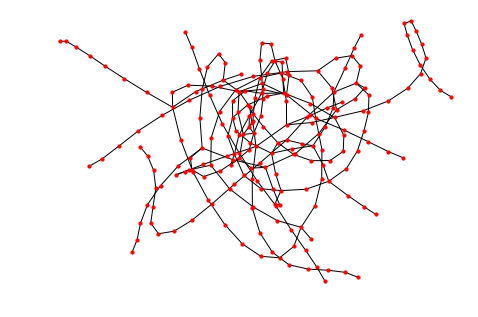

In [100]:
subway_grap = nx.Graph(stations_connection)
nx.draw(subway_grap,with_labels = False,node_size = 10)

In [89]:
def is_goal(desitination,by_way = []):
    def _wrap(current_path):
        for s in by_way:
            if  s not  in current_path:
                return False;
        return current_path[-1] == desitination
    return _wrap

In [90]:
def sort_path(cmp_func,beam = -1):
    def _sorted(pathes):
        if beam == -1:
            return sorted(pathes,key = cmp_func)
        else:
            return sorted(pathes,key = cmp_func)[:beam]
    return _sorted;

def get_total_swaps(path):
    if len(path)<2:
        return 0
    
    res = 0
    pre_line = station_in_line[0] & station_in_line[1]
    pre = path[-1]
    
    for station in path[2:]:
        
        curr_line = station_in_line[station]&station_in_line[pre]
        if curr_line != pre_line:
            res += 1
            
            pre_line = curr_line
            pre = station
        
        
    return res
    
def get_path_distance(path):
    
    distance = 0
    
    for i,c in enumerate(path[:-1]):
        distance += dist[(c,path[i+1])]
        
    return distance
            

In [91]:
get_total_swaps(['纪家庙','丰台站','西局','公主坟','巴沟'])

1

In [92]:
get_path_distance(['纪家庙','丰台站','西局','公主坟','巴沟'])

0

In [93]:
get_path_distance(['大钟寺', '西直门', '车公庄', '阜成门', '复兴门', '长椿街', '宣武门', '菜市口', '陶然亭', '北京南站'])

12698

In [94]:
def search(graph,start,is_goal,search_stratery):
    pathes = [[start]]
    seen = set()
    
    while pathes:
        path = pathes.pop(0)
        frionter = path[-1]
        
        for station in graph[frionter]:
            new_path = path + [station]
            pathes.append(new_path)
            
            
            if is_goal(new_path): return new_path
        pathes = search_stratery(pathes)
    
    

In [ ]:
search(stations_connection, start='大钟寺', is_goal=is_goal('北京南站'), search_stratery=sort_path(get_path_distance))